In [20]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np

results_path = './results/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['id'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['id', 'initializationTime', 'executionTime', 'totalTime', 'algorithm','timestamp'])
results

,id,initializationTime,executionTime,totalTime,algorithm,timestamp
0,graph1,0.479104,6.295648,6.774752,parallelbcsr,20240919154721
1,graph1,0.238336,1.830208,2.068544,parallel,20240919154220
2,graph1,0.006000,0.002000,0.009000,serial,20240919154017
3,graph2,0.633152,4.984960,5.618112,parallelbcsr,20240919154721
4,graph2,0.204256,1.791104,1.995360,parallel,20240919154221
5,graph2,0.005000,0.004000,0.009000,serial,20240919154017
6,graph3b,0.396096,5.308576,5.704672,parallelbcsr,20240919154916
7,graph3b,0.260096,2.138304,2.398400,parallel,20240919154456
8,graph3,0.328224,6.648224,6.976448,parallelbcsr,20240919154722
9,graph3,0.282624,2.238272,2.520896,parallel,20240919154221


In [21]:
mean_results = results.groupby(['id', 'algorithm'])[['initializationTime', 'executionTime', 'totalTime']].mean().reset_index()
mean_results

,id,algorithm,initializationTime,executionTime,totalTime
0,graph1,parallel,0.238336,1.830208,2.068544
1,graph1,parallelbcsr,0.479104,6.295648,6.774752
2,graph1,serial,0.006000,0.002000,0.009000
3,graph2,parallel,0.204256,1.791104,1.995360
4,graph2,parallelbcsr,0.633152,4.984960,5.618112
5,graph2,serial,0.005000,0.004000,0.009000
6,graph3,parallel,0.282624,2.238272,2.520896
7,graph3,parallelbcsr,0.328224,6.648224,6.976448
8,graph3,serial,0.046000,8.712000,8.759000
9,graph3b,parallel,0.260096,2.138304,2.398400


In [22]:
serial_results = mean_results[mean_results['algorithm'] == 'serial']
parallel_results = mean_results[mean_results['algorithm'] == 'parallel']
parallel2_results = mean_results[mean_results['algorithm'] == 'parallelbcsr']
#serial_results = mean_results[mean_results['algorithm'] == 'serial'][:groups]
#parallel_results = mean_results[mean_results['algorithm'] == 'parallel'][:groups]
#parallel2_results = mean_results[mean_results['algorithm'] == 'parallel2'][:groups]
#x = np.arange(groups)
x_serial = np.arange(len(serial_results))-0.2
x_parallel = np.arange(len(parallel_results))
x_parallel2 = np.arange(len(parallel2_results))+0.2
x_serial_line = np.arange(len(serial_results))
x_parallel_line = np.arange(len(parallel_results))
x_parallel2_line = np.arange(len(parallel2_results))
width = 0.2
max_length = max(len(serial_results),len(parallel_results),len(parallel2_results))
ticks = [f'graph_{i}' for i in range(1, max_length+1)]
linestyle = 'dashed'
colors = ['blue', 'red', 'orange']

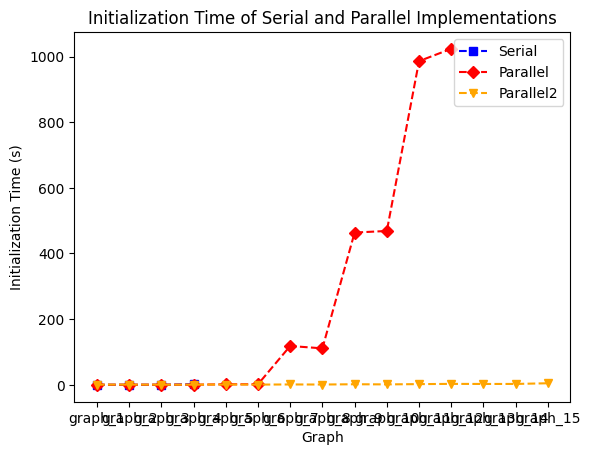

In [23]:
plt.plot(x_serial_line, serial_results['initializationTime'], label='Serial', marker='s', linestyle=linestyle, color=colors[0])
plt.plot(x_parallel_line, parallel_results['initializationTime'], label='Parallel', marker='D', linestyle=linestyle, color=colors[1])
plt.plot(x_parallel2_line, parallel2_results['initializationTime'], label='Parallel2', marker='v', linestyle=linestyle, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Initialization Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

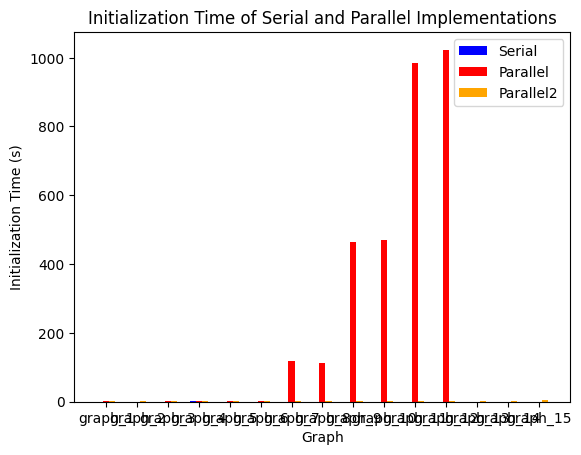

In [24]:
plt.bar(x_serial, serial_results['initializationTime'], label='Serial', width=width, color=colors[0])
plt.bar(x_parallel, parallel_results['initializationTime'], label='Parallel', width=width, color=colors[1])
plt.bar(x_parallel2, parallel2_results['initializationTime'], label='Parallel2', width=width, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Initialization Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Initialization Time (s)')
plt.show()

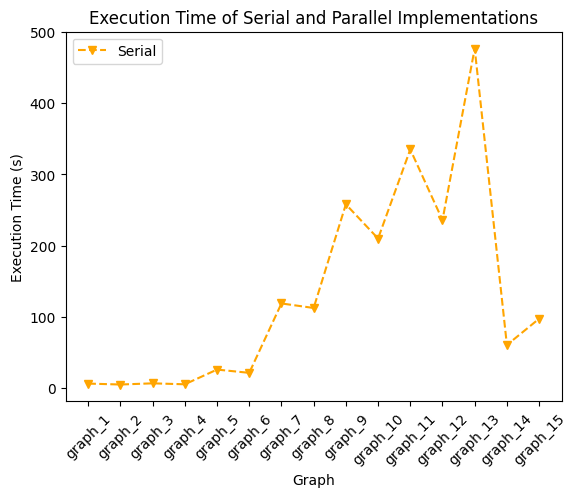

In [25]:
#plt.plot(x_serial_line, serial_results['executionTime'], label='Serial', marker='s', linestyle=linestyle, color=colors[0])
#plt.plot(x_parallel_line, parallel_results['executionTime'], label='Parallel', marker='D', linestyle=linestyle, color=colors[1])
plt.plot(x_parallel2_line, parallel2_results['executionTime'], label='Parallel2', marker='v', linestyle=linestyle, color=colors[2])
plt.xticks(np.arange(max_length), ticks, rotation=45)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Execution Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.show()

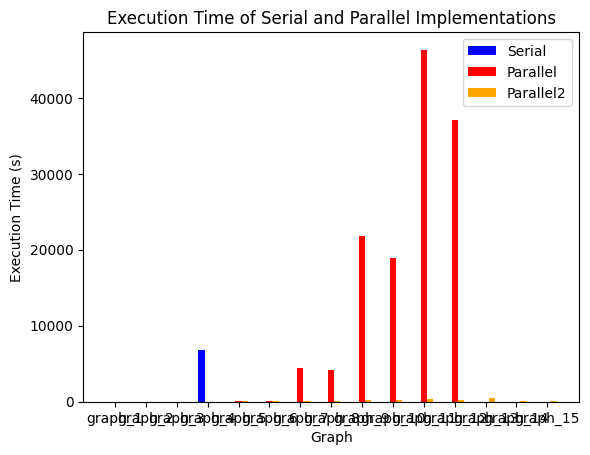

In [26]:
plt.bar(x_serial, serial_results['executionTime'], label='Serial', width=width, color=colors[0])
plt.bar(x_parallel, parallel_results['executionTime'], label='Parallel', width=width, color=colors[1])
plt.bar(x_parallel2, parallel2_results['executionTime'], label='Parallel2', width=width, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Execution Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.show()

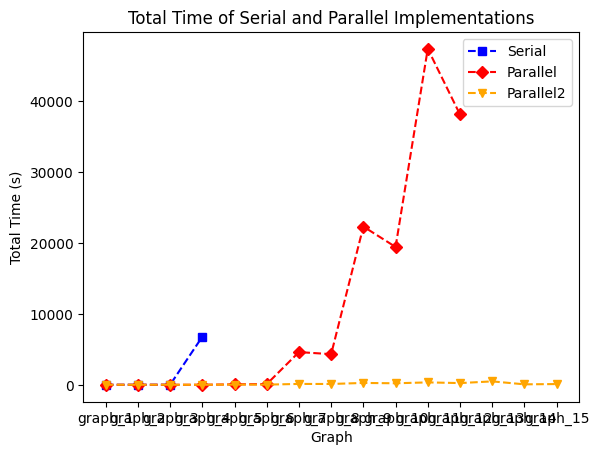

In [27]:
plt.plot(x_serial_line, serial_results['totalTime'], label='Serial', marker='s', linestyle=linestyle, color=colors[0])
plt.plot(x_parallel_line, parallel_results['totalTime'], label='Parallel', marker='D', linestyle=linestyle, color=colors[1])
plt.plot(x_parallel2_line, parallel2_results['totalTime'], label='Parallel2', marker='v', linestyle=linestyle, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Total Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Total Time (s)')
plt.show()

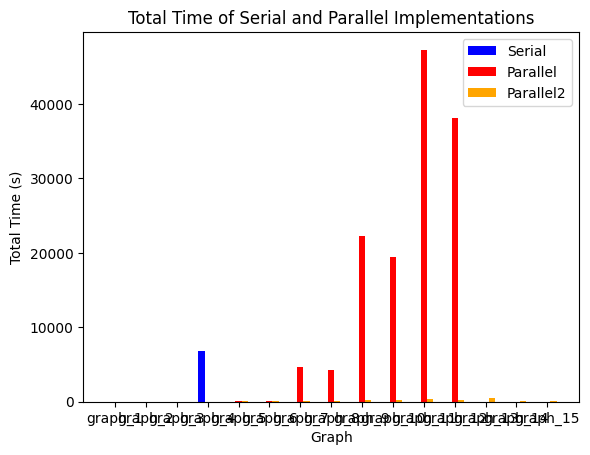

In [28]:
plt.bar(x_serial, serial_results['totalTime'], label='Serial', width=width, color=colors[0])
plt.bar(x_parallel, parallel_results['totalTime'], label='Parallel', width=width, color=colors[1])
plt.bar(x_parallel2, parallel2_results['totalTime'], label='Parallel2', width=width, color=colors[2])
plt.xticks(np.arange(max_length), ticks)
plt.legend(['Serial', 'Parallel', 'Parallel2'])
plt.title('Total Time of Serial and Parallel Implementations')
plt.xlabel('Graph')
plt.ylabel('Total Time (s)')
plt.show()